In [1]:
from math import sqrt, fabs

## Initial Data

In [2]:
#constant
const_pi = 3.1415

#dam profile
B = 46
n = 0.3  #0.1 - 0.5
Ht = 50 #height of triangle profile
H2 = 105.2 - 98 # = 7.2 meters

#section profile
b = 5 #meters
D = 10 #meters
d = 5 #meters

#coast:
Bc = 8 #meters

#reservoir
hw = 0.8 #meters
W_ice = 10 #in tons / m
h_ice = 1 #in meters
H_allu = 24 #in meters - Alluvium layer thickness

#density
dens_c = 2.4 #tons / m ** 3 - Concrete
dens_w = 1 #ton / m ** 3 - Water
dens_allu = 1.05 #tons / m ** 3 - Alluvium

#criteria
#sigma_a = 0.1 #MPa
#sigma_a = 100000 #Pa = N/m**2
#sigma_a = 100 #kN / m**2
sigma_a = 1000 #tons / m**2

#secondary data
Lw = 11 * hw #in meters
dhw = const_pi * hw ** 2 / Lw #in meters
m = B / Ht - n
dc = hw + dhw + 0.6 #meters
ec = 1 #meters

print("in meters:")
print("Dam height (Ht) =", Ht)
print("Dam foot width (B) =", B)
print("(Nakat?) dhw =",dhw)
print("Height above reservoir level (dc) =", dc)
print("m =", m)
print("Lower beef depth (H2) =", H2)

in meters:
Dam height (Ht) = 50
Dam foot width (B) = 46
(Nakat?) dhw = 0.2284727272727273
Height above reservoir level (dc) = 1.6284727272727273
m = 0.6200000000000001
Lower beef depth (H2) = 7.200000000000003


## Functions

In [3]:
def secondary_data(detailed=False):
    Lw = 11 * hw #in meters
    dhw = const_pi * hw ** 2 / Lw #in meters
    m = B / Ht - n
    dc = hw + dhw + 0.6 #meters
    #ec = 0.5 #meters
    if detailed == True:
        print("Dam coast height =", dc)
        print("m =", m)

def static_calculation(*, show_winter=False, output, print_all=True, detailed=False):
    
    #geometrical characteristics

    sqrt1n = sqrt(1 + n ** 2)
    a = (D - d) / 2

    F = B * d + a * (2 * b + a * sqrt1n)
    #print("Area (F) =", F)

    x_cm = (0.5 * B ** 2 * d + a * b ** 2 + a ** 2 * (b + a * sqrt1n / 3) * sqrt1n) / F
    #print("x_A (x_cm) =", x_cm)
    x_B = B - x_cm
    #print("x_B =", x_B)

    Jy_list = [0, 0, 0, 0, 0, 0]
    Jy_list[0] = B ** 3 * d / 12
    Jy_list[1] = a * b ** 3 / 6
    Jy_list[2] = a ** 4 / 18 * sqrt1n ** 1.5
    Jy_list[3] = (x_cm - 0.5 * B) ** 2 * B * d
    Jy_list[4] = 2 * (x_cm - 0.5 * b) ** 2 * a * b
    Jy_list[5] = a ** 2 *(x_cm - b - a * sqrt1n / 3) ** 2 * sqrt1n

    Jy = 0
    for item in Jy_list:
        Jy += item
    #print("Jy =", Jy)

    W_A = Jy / x_cm
    W_B = Jy / x_B

    #print("W_A =", W_A)
    #print("W_B =", W_B)

    #Loads
    #own weight

    G1 = G1 = 0.5 * dens_c * B * Ht * d
    M1 = dens_c * Ht * B * d * (B - 3 * x_cm + n * Ht) / 6

    G2 = dens_c * Ht * (a * sqrt1n + 2 * b) * a
    M2_1 = (2*a + 4*b) * x_cm / 2
    M2_2 = b + n * Ht
    M2_3 = a * (2 * a + 6 * b + 3 * n * Ht) / 6
    M2 = dens_c * Ht * a * (M2_1 - M2_2 - M2_3)

    G3 = dens_c * Bc * D * dc
    M3 = G3 * (x_cm - n * Ht - ec)

    a1 = (0.5 * Bc - ec)
    G4 = 0.5 * dens_c * D * a1 ** 2 / n
    M4 = -G4 * (x_cm - n * Ht + 2 * a1 / 3)

    a2 = (0.5 * Bc - ec)
    G5 = -0.5 * dens_c * n * D * a2 ** 2 / m ** 2
    M5_1 = n * Ht * (1 - 2 * b / (3 * B))
    M5 = G5 * (x_cm - b - M5_1)

    G6_1 = a ** 2 / (6 * B * (1 + n ** 2))
    G6_2 = (n * B + (1-n) * Ht) * (D + 2 * d)
    G6_3 = 3 * (1 + n ** 2) * (D + d) * b * Ht / a
    G6 = -dens_c * G6_1 * (G6_2 + G6_3)
    
    M6_1 = a ** 2 * (D + 2 * d) / (6 * (1 + n ** 2) * B ** 2)
    M6_1_1 = (x_cm - n * Ht - b) * (n * B + Ht * (1 - n)) * B
    M6_1_2 = n * b * Ht ** 2 * (1 - n)
    M6_2 = a ** 3 * (D + 3 * d) / (24 * B ** 2 * sqrt1n)
    M6_2_1 = n * B ** 2 * (2 + n ** 2)
    M6_2_2 = (1-n) * (2*B - n * (1-n) * Ht) * Ht
    M6_3 = a * (D+d) * b * Ht / 2 / B
    M6_3_1 = x_cm - n * Ht - b
    M6_3_2 = 2 * a * (D + 2 * d) * B + 3 * n * (1 + n ** 2) * b * Ht * d
    M6_3_3 = 6 * (1+n**2) * B * d
    M6 = -dens_c * M6_1 * (M6_1_1 + M6_1_2) + dens_c * M6_2 * (M6_2_1 + M6_2_2) - dens_c * M6_3 * (M6_3_1 - M6_3_2 / M6_3_3)

    if detailed == True:
        print("Own weight:")
        print("G =", end=" ")
        print(G1 + G2 + G3 + G4 + G5 + G6)
        print("M =", end=" ")
        print(M1 + M2 + M3 + M4 + M5 + M6)
        print()

    #water pressure

    #upper horizontal
    H1 = Ht
    W_uphor = 0.5 * dens_w * H1 ** 2 * D
    M_uphor = dens_w * H1 ** 3 * D / 6

    #upper vertical
    W_upvert = n * W_uphor
    M_upvert = - dens_w * n * D * H1 ** 2 * (3 * x_cm - n * H1) / 6

    #lower horizontal
    W_lowhor = -0.5 * dens_w * H2 ** 2 * D
    M_lowhor = W_lowhor * H2 / 3

    #lower vertical
    W_lowvert = (n - B * d / Ht / D) * W_lowhor
    M_lowvert_1 = 2 * n * a * (x_cm - b - a / 2 - n * H2 / 3)
    M_lowvert_2 = m * (x_B - m * H2 / 3) * d
    M_lowvert = (M_lowvert_1 + M_lowvert_2) * W_lowhor / D

    #filtering pressure

    U1 = -dens_w * H2 * (D * b + a * (D + d) / 2 + (B - b - a) * d)
    M_U1 = 0
    U2 = -dens_w * (H1 - H2) * (b + a) * D
    M_U2 = -U2 * (x_cm - (b + a) / 2)

    #alluvium pressure

    W_alluhor = 0.5 * dens_allu * H_allu ** 2 * D
    M_alluhor = W_alluhor * H_allu / 3

    W_alluvert = 0.5 * dens_allu * n * H_allu ** 2 * D
    M_alluvert = -W_alluvert *  (x_cm - n * H_allu / 3)

    #wave pressure

    W_wavhor = dens_w * hw * (Lw / const_pi + hw / 2) * D / 2
    M_wavhor = W_wavhor * (H1 - Lw / 2 / const_pi + 3 * hw / 8)

    W_wavvert = W_wavhor * n

    #ice pressure

    M_ice = W_ice * (H1 - 0.45 * h_ice)

    #summary

    N = G1 + G2 + G3 + G4 + G5 + G6 + W_upvert + W_lowvert + U1 + U2 + W_wavvert + W_alluvert
    Qsummer = W_uphor + W_lowhor + W_alluhor + W_wavhor
    Qwinter = W_uphor + W_lowhor + W_alluhor + W_ice
    Msummer = M1 + M2 + M3 + M4 + M5 + M6 + M_uphor + M_lowhor + M_upvert + M_lowvert + M_U2 + M_alluhor + M_alluvert + M_wavhor
    Mwinter = M1 + M2 + M3 + M4 + M5 + M6 + M_uphor + M_lowhor + M_upvert + M_lowvert + M_U2 + M_alluhor + M_alluvert + M_ice

    #stretching stress criteria
    #stretch = sigma_a * B ** 2 - N * B + 6 * Msummer
    stretch = N / F + Msummer / W_A
    
    #sustainability criteria
    sustain = 0.72 * N + 20 * F
    sustain2 = Qsummer * 1.2
    
    if print_all == True:
        print("B =", B, end=", ")
        print("Ht =", Ht, end=", ")
        print("n =", n)
        print("N =", N, "tons")
        print("Qsummer =", Qsummer, "tons", "Msummer =" , Msummer, "tons * m", sep=" | ")
        if show_winter == True:
            print("Qwinter =", Qwinter, "tons", "Mwinter =" , Mwinter, "tons * m", sep=" | ")
        print()
        print("Stretching stress criteria (must be more than 10) =", stretch)
        print()
        print("Sustainability criteria (must be close to 0) =", sustain - sustain2)
        
    if output == "Msummer":
        return Msummer
    if output == "Qsummer":
        return Qsummer
    if output == "N":
        return N
    if output == "stretch":
        return stretch
    if output == "sustain":
        return sustain - sustain2

# Finding optimal profile

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## Detailed example of calculation

In [5]:
B = 50
n = 0.3
Ht = 50
secondary_data(detailed=True)
static_calculation(show_winter=True, output=None, detailed=True)

Dam coast height = 1.6284727272727273
m = 0.7
Own weight:
G = 19100.53099133916
M = 53711.77376719731

B = 50, Ht = 50, n = 0.3
N = 18578.41244287505 tons
Qsummer = | 15277.604838452968 | tons | Msummer = | 259792.71332316007 | tons * m
Qwinter = | 15274.8 | tons | Mwinter = | 259662.064467261 | tons * m

Stretching stress criteria (must be more than 10) = 155.46079167899734

Sustainability criteria (must be close to 0) = 673.8349840878545


## Plotting B

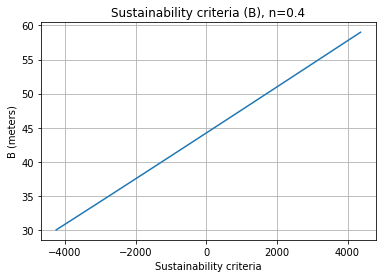

Min stretch stress criteria value (must be greater than 10):
130.9

Sustainability criteria values: 
Sustain  | B
____________
-4246.60 | 30
-3944.94 | 31
-3643.89 | 32
-3343.39 | 33
-3043.40 | 34
-2743.86 | 35
-2444.75 | 36
-2146.02 | 37
-1847.65 | 38
-1549.61 | 39
-1251.88 | 40
-954.431 | 41
-657.240 | 42
-360.293 | 43
-63.5743 | 44
232.9330 | 45
529.2420 | 46
825.3654 | 47
1121.314 | 48
1417.100 | 49
1712.733 | 50
2008.221 | 51
2303.572 | 52
2598.795 | 53
2893.897 | 54
3188.884 | 55
3483.762 | 56
3778.538 | 57
4073.216 | 58
4367.801 | 59


In [6]:
B = 40
n = 0.4
stretch_list = []
sustain_list = []
B_list = []

B = 30

for i in range(30):
    secondary_data()
    B_list.append(B)
    sustain_list.append(static_calculation(show_winter=False, output="sustain", print_all=False))
    stretch_list.append(static_calculation(show_winter=False, output="stretch", print_all=False))
    B += 1

fig, ax = plt.subplots()
ax.plot(sustain_list, B_list)
ax.set(ylabel = "B (meters)", xlabel = "Sustainability criteria", title = "Sustainability criteria (B), n="+str(n))
ax.grid()

#fig.savefig("test.png")
plt.show()

print("Min stretch stress criteria value (must be greater than 10):")
print(str(min(stretch_list))[:5])
print()
print("Sustainability criteria values: ")
print("Sustain  | B")
print("____________")
for i in range(len(B_list)):
    print(str(sustain_list[i])[:8], B_list[i], sep=" | ")

## Plotting n

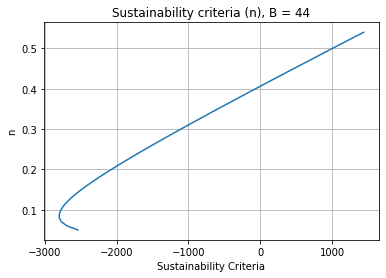

Min stretch stress criteria value (must be greater than 10):
163.1

Sustainability criteria values: 
Sustain  | n
____________
-2539.31 | 0.05
-2690.07 | 0.06
-2766.71 | 0.07
-2796.98 | 0.08
-2796.33 | 0.09
-2774.00 | 0.09
-2735.89 | 0.10
-2685.92 | 0.11
-2626.82 | 0.12
-2560.53 | 0.13
-2488.47 | 0.15
-2411.71 | 0.16
-2331.06 | 0.17
-2247.17 | 0.18
-2160.54 | 0.19
-2071.56 | 0.20
-1980.57 | 0.21
-1887.82 | 0.22
-1793.54 | 0.23
-1697.92 | 0.24
-1601.10 | 0.25
-1503.22 | 0.26
-1404.39 | 0.27
-1304.70 | 0.28
-1204.24 | 0.29
-1103.08 | 0.30
-1001.28 | 0.31
-898.900 | 0.32
-795.979 | 0.33
-692.564 | 0.34
-588.694 | 0.35
-484.402 | 0.36
-379.718 | 0.37
-274.670 | 0.38
-169.281 | 0.39
-63.5743 | 0.40
42.43115 | 0.41
148.7169 | 0.42
255.2665 | 0.43
362.0648 | 0.44
469.0981 | 0.45
576.3538 | 0.46
683.8201 | 0.47
791.4863 | 0.48
899.3427 | 0.49
1007.379 | 0.50
1115.589 | 0.51
1223.963 | 0.52
1332.495 | 0.53
1441.176 | 0.54


In [7]:
B = 44
n = 0.4
stretch_list = []
n_list = []
sustain_list = []

n = 0.05
for i in range(50):
    secondary_data()
    n_list.append(n)
    sustain_list.append(static_calculation(show_winter=False, output="sustain", print_all=False))
    stretch_list.append(static_calculation(show_winter=False, output="stretch", print_all=False))
    n += 0.01

fig, ax = plt.subplots()
ax.plot(sustain_list, n_list)
#ax.ticklabel_format(style = 'plain')

ax.set(xlabel='Sustainability Criteria', ylabel='n',
       title='Sustainability criteria (n), B = '+str(B))
ax.grid()

#fig.savefig("test.png")
plt.show()

print("Min stretch stress criteria value (must be greater than 10):")
print(str(min(stretch_list))[:5])
print()
print("Sustainability criteria values: ")
print("Sustain  | n")
print("____________")
for i in range(len(n_list)):
    print(str(sustain_list[i])[:8], str(n_list[i])[:4], sep=" | ")

## Figuring out B(n) dependence

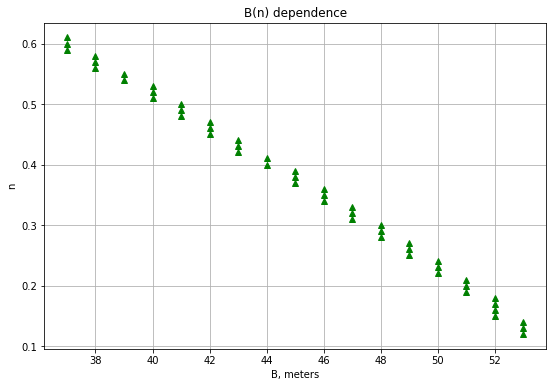

In [16]:
B = 30
n = 0.3
B_list = []
n_list = []

n = 0.12
for i in range(50):
    B = 30
    sustain_min = None
    B_sustain = None
    for j in range(31):
        #sustain_list.append(abs(static_calculation(show_winter=False, output="sustain", print_all=False)))
        current_sustain = abs(static_calculation(show_winter=False, output="sustain", print_all=False))
        if sustain_min == None:
            sustain_min = current_sustain
        if B_sustain == None:
            B_sustain = B
        if current_sustain < sustain_min:
            sustain_min = current_sustain
            B_sustain = B
        B += 1
    B_list.append(B_sustain)
    n_list.append(n)
    n += 0.01
    
#plotting

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(B_list, n_list ,"g^")
#ax.ticklabel_format(style = 'plain')

ax.set(xlabel='B, meters', ylabel='n',
       title='B(n) dependence')
ax.grid()

#fig.savefig("test.png")
plt.show()

## Overall check

In [9]:
B = 44
n = 0.4
secondary_data()
static_calculation(show_winter=True, output=None, print_all=True)

B = 44, Ht = 50, n = 0.4
N = 18381.83657341873 tons
Qsummer = | 15277.604838452968 | tons | Msummer = | 275237.4367416693 | tons * m
Qwinter = | 15274.8 | tons | Mwinter = | 275106.78788577026 | tons * m

Stretching stress criteria (must be more than 10) = 192.07466605913152

Sustainability criteria (must be close to 0) = -63.57435310371511
